# <center>UNIST<br>School of Business Administration</center>

## FIA303 : Futures and Options

### <div style="text-align:right"> School of Natural Science - 2012121229 <br>JunPyo Park </div>

Before solving the questions, import some modules.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style('grade3')

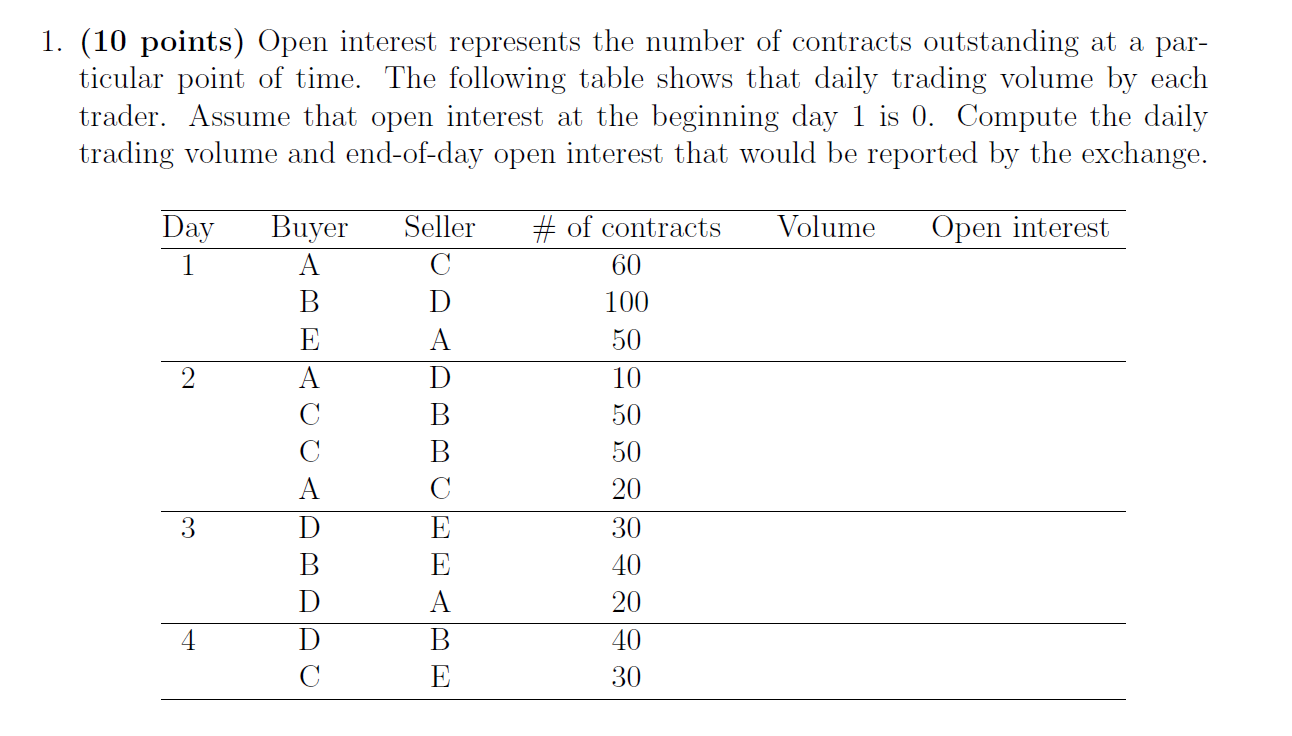

### - First make a DataFrame for given problem.

In [2]:
data = [[1,'A','C',60],[1,'B','D',100],[1,'E','A',50],[2,'A','D',10],[2,'C','B',50],[2,'C','B',50],[2,'A','C',20],
       [3,'D','E',30],[3,'B','E',40],[3,'D','A',20],[4,'D','B',40],[4,'C','E',30]]

In [3]:
df = pd.DataFrame(data,columns=['Day','Buyer','Seller','number_of_contracts'])
df = df.set_index('Day')
df

,Buyer,Seller,number_of_contracts
Day,,,
1,A,C,60
1,B,D,100
1,E,A,50
2,A,D,10
2,C,B,50
2,C,B,50
2,A,C,20
3,D,E,30
3,B,E,40


### - Make a Calculation table(calc_table) to show each transaction(Buyer and Seller relation).

> **Then we can get the trading volume for each transaction.**

In [4]:
column = ['A','B','C','D','E','Volume']
calc_table = pd.DataFrame(np.zeros([len(df),len(column)]),index = df.index, columns = column)
volume = 0
day = 1
for i,row in enumerate(df.iterrows()):
    calc_table.iloc[i][row[1]['Buyer']] = row[1]['number_of_contracts']
    calc_table.iloc[i][row[1]['Seller']] = -row[1]['number_of_contracts']
    if day == row[0] :
        volume += row[1]['number_of_contracts']
        calc_table.iloc[i]['Volume'] = volume
    else:
        calc_table.iloc[i-1]['Volume'] = volume
        volume = row[1]['number_of_contracts']
        calc_table.iloc[i]['Volume'] = volume
        day = row[0]
calc_table.iloc[-1]['Volume'] = volume
calc_table

,A,B,C,D,E,Volume
Day,,,,,,
1,60.0,0.0,-60.0,0.0,0.0,60.0
1,0.0,100.0,0.0,-100.0,0.0,160.0
1,-50.0,0.0,0.0,0.0,50.0,210.0
2,10.0,0.0,0.0,-10.0,0.0,10.0
2,0.0,-50.0,50.0,0.0,0.0,60.0
2,0.0,-50.0,50.0,0.0,0.0,110.0
2,20.0,0.0,-20.0,0.0,0.0,130.0
3,0.0,0.0,0.0,30.0,-30.0,30.0
3,0.0,40.0,0.0,0.0,-40.0,70.0


### - By calculating the cumulative sum, we can get (cumulative) Open_Interest for this contract.

```python
pandas.Series.where(condition) # this filters the data which satisfies the condition
```

In [5]:
for i in range(1,len(calc_table)):
    calc_table.iloc[i][:-1] = calc_table.iloc[i][:-1] + calc_table.iloc[i-1][:-1] # cumulative sum

# To calculate Open Interest, 
# add only positive data for each row
calc_table['Open_Interest'] = calc_table.apply(lambda x : x[:-1].where(x>0).sum(),axis=1) 
calc_table

,A,B,C,D,E,Volume,Open_Interest
Day,,,,,,,
1,60.0,0.0,-60.0,0.0,0.0,60.0,60.0
1,60.0,100.0,-60.0,-100.0,0.0,160.0,160.0
1,10.0,100.0,-60.0,-100.0,50.0,210.0,160.0
2,20.0,100.0,-60.0,-110.0,50.0,10.0,170.0
2,20.0,50.0,-10.0,-110.0,50.0,60.0,120.0
2,20.0,0.0,40.0,-110.0,50.0,110.0,110.0
2,40.0,0.0,20.0,-110.0,50.0,130.0,110.0
3,40.0,0.0,20.0,-80.0,20.0,30.0,80.0
3,40.0,40.0,20.0,-80.0,-20.0,70.0,100.0


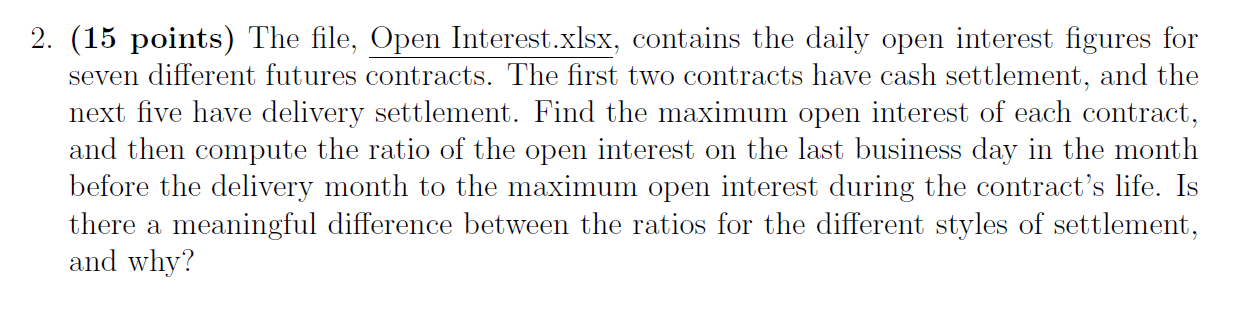

### - Open the data and do some processing(type conversion, reshaping for easy calculation)

In [6]:
open_interest = pd.read_csv('open_interest.csv')

In [7]:
open_interest = open_interest.set_index('Date')
open_interest.tail(10)

,SP&500 (2002/03),Eurodollar (2002/03),Soybeans (2002/03),Cotton (2002/03),Crude Oil (2002/03),Tbonds (2002/03),Copper (2002/03)
Date,,,,,,,
2002-03-13,124969.0,662962.0,849.0,NaN,NaN,34338.0,3118
2002-03-14,106093.0,643762.0,497.0,NaN,NaN,29523.0,2711
2002-03-15,NaN,632942.0,NaN,NaN,NaN,25160.0,2125
2002-03-18,NaN,NaN,NaN,NaN,NaN,20113.0,2113
2002-03-19,NaN,NaN,NaN,NaN,NaN,11979.0,1021
2002-03-20,NaN,NaN,NaN,NaN,NaN,NaN,928
2002-03-21,NaN,NaN,NaN,NaN,NaN,NaN,1069
2002-03-22,NaN,NaN,NaN,NaN,NaN,NaN,815
2002-03-25,NaN,NaN,NaN,NaN,NaN,NaN,659


In [8]:
open_interest.index = pd.Series(open_interest.index).apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
open_interest = open_interest.T

### - Get Maximum_Value for each future contracts

In [9]:
stats = pd.DataFrame(open_interest.apply(lambda x : max(x),axis=1),columns=['Maximum_Value'])
stats

,Maximum_Value
SP&500\n(2002/03),482048.0
Eurodollar\n(2002/03),782976.0
Soybeans\n(2002/03),78022.0
Cotton\n(2002/03),32211.0
Crude Oil\n(2002/03),133118.0
Tbonds\n(2002/03),458510.0
Copper\n(2002/03),41763.0


### - Show the Data from month before the dilivery month

In [10]:
open_interest.T['2002-02':'2002-02']

,SP&500 (2002/03),Eurodollar (2002/03),Soybeans (2002/03),Cotton (2002/03),Crude Oil (2002/03),Tbonds (2002/03),Copper (2002/03)
Date,,,,,,,
2002-02-01,474811.0,758791.0,62715.0,24582.0,123354.0,457263.0,37816.0
2002-02-04,476833.0,756691.0,61241.0,23401.0,117317.0,456196.0,38425.0
2002-02-05,477471.0,754089.0,61517.0,23201.0,110070.0,454491.0,39008.0
2002-02-06,477969.0,757383.0,62918.0,22339.0,110218.0,449639.0,39262.0
2002-02-07,478103.0,757092.0,60287.0,21631.0,103786.0,453841.0,40183.0
2002-02-08,477399.0,758276.0,60275.0,21862.0,95507.0,458510.0,40323.0
2002-02-11,472467.0,756830.0,57286.0,19315.0,86477.0,451417.0,39776.0
2002-02-12,471769.0,760218.0,55842.0,16410.0,85623.0,446464.0,39672.0
2002-02-13,467597.0,765066.0,54425.0,12984.0,67102.0,444161.0,41763.0


In [11]:
stats['Last_before_1m'] = open_interest.T['2002-02':'2002-02'].apply(lambda x : x.dropna()[-1], axis=0)
stats

,Maximum_Value,Last_before_1m
SP&500\n(2002/03),482048.0,397540.0
Eurodollar\n(2002/03),782976.0,767903.0
Soybeans\n(2002/03),78022.0,13458.0
Cotton\n(2002/03),32211.0,85.0
Crude Oil\n(2002/03),133118.0,11006.0
Tbonds\n(2002/03),458510.0,172651.0
Copper\n(2002/03),41763.0,3868.0


### - Plot the ratio($=\frac{daily\,\, open\,\, interest}{maximum \,\,open\,\, interest}$) of each futures

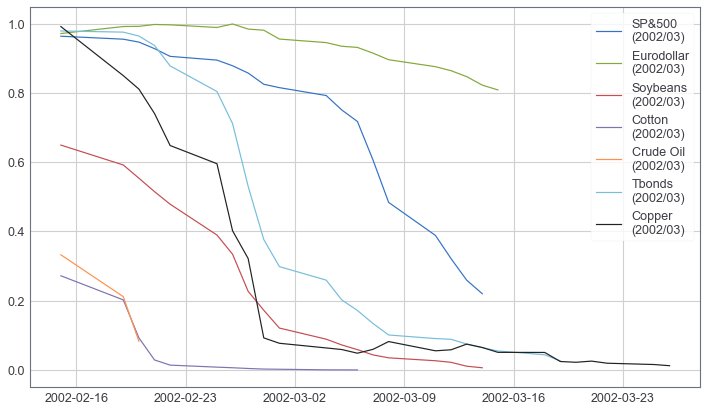

In [12]:
plt.figure(figsize=(12,7))
for i in range(len(open_interest)):
    plt.plot(open_interest.T['2002-02-15':].index, open_interest.iloc[i]['2002-02-15':]/stats['Maximum_Value'].iloc[i],
             label=open_interest.index[i])
plt.legend()
plt.show()

### - For more detailed analysis, calculating the maximal drawdown(MDD) of that ratio on that period(window = 20, 1 month) 

In [13]:
def get_mdd(series):
    # We are going to use a trailing 20 trading day window(1 month)
    window = 20

    # Calculate the max drawdown in the past window days for each day in the series.
    # Use min_periods=1 if you want to let the first 252 days data have an expanding window
    Roll_Max = pd.Series.rolling(series, window, min_periods=1,center=False).max()
    Daily_Drawdown = series/Roll_Max - 1.0

    # Next we calculate the minimum (negative) daily drawdown in that window.
    # Again, use min_periods=1 if you want to allow the expanding window
    Max_Daily_Drawdown = pd.Series.rolling(Daily_Drawdown, window, min_periods=1,center=False).min()
    return (Max_Daily_Drawdown.min())  # 음수이기 때문에 minimum이 MDD값임

In [14]:
stats['ratio(%)'] = stats['Last_before_1m']/ stats['Maximum_Value'] * 100
stats['MDD(%)'] = open_interest.loc[:,'2002-02':].apply(lambda x : get_mdd(x/x.max()),axis=1) * 100
stats.sort_values(by='ratio(%)',ascending=False)

,Maximum_Value,Last_before_1m,ratio(%),MDD(%)
Eurodollar\n(2002/03),782976.0,767903.0,98.074909,-19.058848
SP&500\n(2002/03),482048.0,397540.0,82.468966,-77.155512
Tbonds\n(2002/03),458510.0,172651.0,37.654795,-97.289396
Soybeans\n(2002/03),78022.0,13458.0,17.248981,-99.060172
Copper\n(2002/03),41763.0,3868.0,9.261787,-96.998609
Crude Oil\n(2002/03),133118.0,11006.0,8.267853,-91.077711
Cotton\n(2002/03),32211.0,85.0,0.263885,-99.968665


We can observe that there are more possibility to get higher ratio & MDD in the physical delivery contracts. This is because physical delivery costs a lot. Especially in the view of MDD, physical delivery futures have almost 100% drawdown on the other hand cash settlement futures have relatively small amount of drawdown. Because cash settlement futures has no delivery costs at the expiration day.

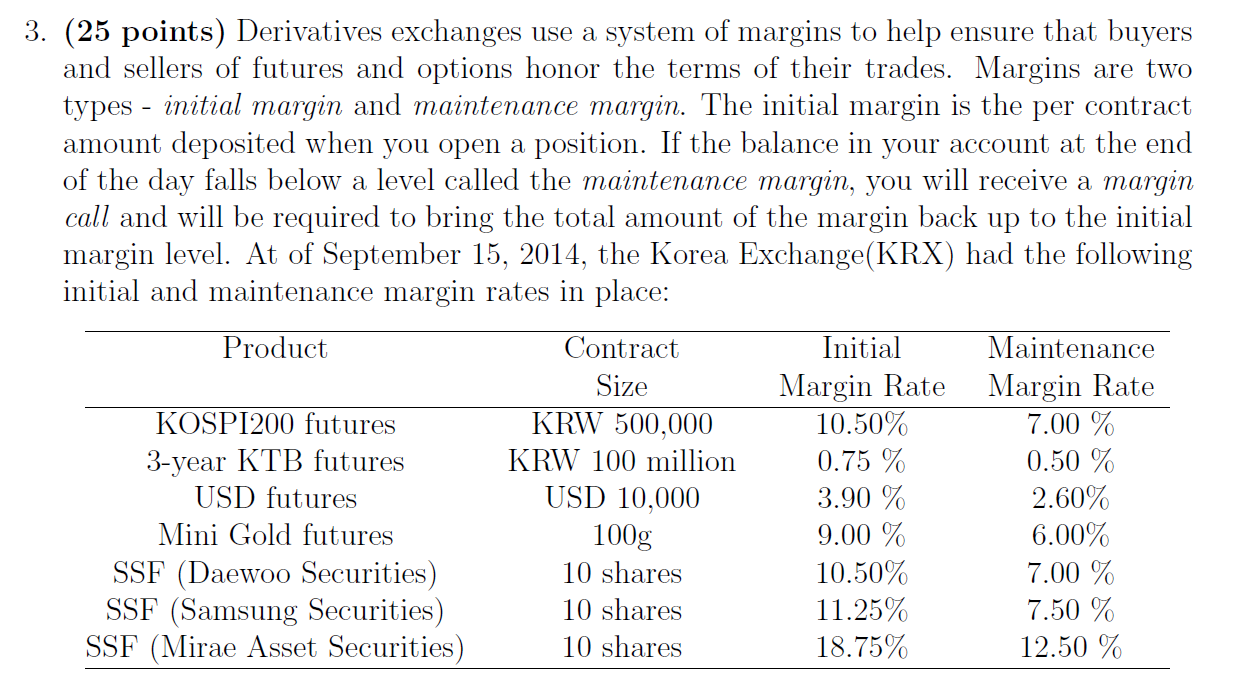

In [15]:
data = [['KOSPI200_futures',0.5,10.5,7,'Milion Won'],['3_years_KTB_futures',100,0.75,0.5,'Milion Won'],['USD_futures',10000,3.9,2.6,'USD'],
       ['Mini_Gold_futures',100,9,6,'gram'],['SSF_Daewoo',10,10.5,7,'shares'],['SSF_Samsung',10,11.25,7.5,'shares'],
        ['SSF_Mirae',10,18.75,12.5,'shares']]
product_df = pd.DataFrame(data,columns=['Product','Contract_Size','Initial_Margin_Rate','Maintenance_Margin_Rate','Unit'])
product_df

,Product,Contract_Size,Initial_Margin_Rate,Maintenance_Margin_Rate,Unit
0,KOSPI200_futures,0.5,10.50,7.0,Milion Won
1,3_years_KTB_futures,100.0,0.75,0.5,Milion Won
2,USD_futures,10000.0,3.90,2.6,USD
3,Mini_Gold_futures,100.0,9.00,6.0,gram
4,SSF_Daewoo,10.0,10.50,7.0,shares
5,SSF_Samsung,10.0,11.25,7.5,shares
6,SSF_Mirae,10.0,18.75,12.5,shares


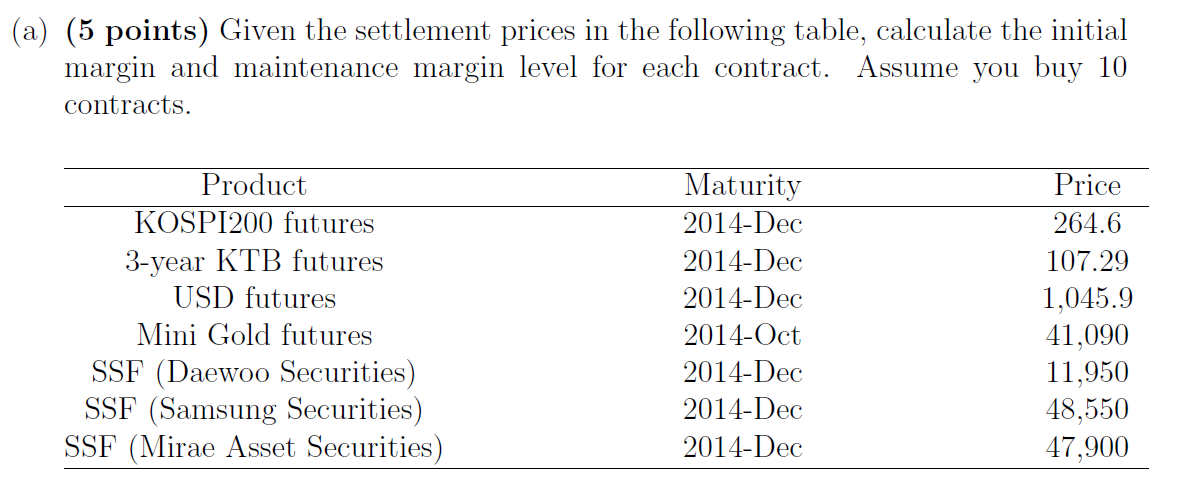

In [16]:
price_data = [264.6, 107.29, 1045.9, 41090, 11950, 48550, 47900]

In [17]:
product_df['price'] = price_data
product_df

,Product,Contract_Size,Initial_Margin_Rate,Maintenance_Margin_Rate,Unit,price
0,KOSPI200_futures,0.5,10.50,7.0,Milion Won,264.60
1,3_years_KTB_futures,100.0,0.75,0.5,Milion Won,107.29
2,USD_futures,10000.0,3.90,2.6,USD,1045.90
3,Mini_Gold_futures,100.0,9.00,6.0,gram,41090.00
4,SSF_Daewoo,10.0,10.50,7.0,shares,11950.00
5,SSF_Samsung,10.0,11.25,7.5,shares,48550.00
6,SSF_Mirae,10.0,18.75,12.5,shares,47900.00


In [18]:
product_df['initial_margin'] = product_df['Contract_Size'] * product_df['Initial_Margin_Rate']/100 * 10 * product_df['price']

In [19]:
product_df['maintenance_margin'] = product_df['Contract_Size'] * product_df['Maintenance_Margin_Rate']/100 * 10 * product_df['price']

In [20]:
new_col = ['Product'] + list(product_df.columns.values[6:]) + ['Unit']
product_df[new_col]

,Product,initial_margin,maintenance_margin,Unit
0,KOSPI200_futures,138.915,92.61,Milion Won
1,3_years_KTB_futures,804.675,536.45,Milion Won
2,USD_futures,4079010.000,2719340.00,USD
3,Mini_Gold_futures,3698100.000,2465400.00,gram
4,SSF_Daewoo,125475.000,83650.00,shares
5,SSF_Samsung,546187.500,364125.00,shares
6,SSF_Mirae,898125.000,598750.00,shares


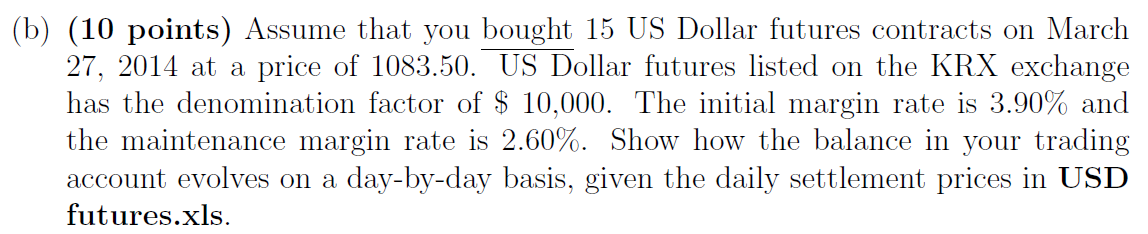

In [21]:
usd_futures = pd.read_csv('USD_Futures.csv',index_col='End_of_day')
usd_futures.head()

,Settlement price,Margin Account,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
End_of_day,,,,,,,
NaN,NaN,Mark-to-market,Maintenance Check,Initial Margin,Maintenance Margin,Cash Deposit,Ending Balance
2014/03/27,1083.5,0,NaN,6338475,4225650,6338475,6338475
2014/03/28,1081.5,-300000,6038475,6326775,4217850,0,6038475
2014/03/31,1076.8,NaN,NaN,NaN,NaN,NaN,NaN
2014/04/01,1070.3,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
column_list = [('','Settlement price')]
for i in usd_futures.iloc[0,1:]:
    column_list.append(('Margin Account',i))
multi_col = pd.MultiIndex.from_tuples(column_list)

In [23]:
usd_futures = usd_futures.iloc[1:]
usd_futures.columns = multi_col
usd_futures.head()

Margin Account                      \
           Settlement price  Mark-to-market   Maintenance Check    
End_of_day                                                         
2014/03/27           1083.5               0                  NaN   
2014/03/28           1081.5         -300000             6038475    
2014/03/31           1076.8              NaN                 NaN   
2014/04/01           1070.3              NaN                 NaN   
2014/04/02           1069.5              NaN                 NaN   

                                                                              
            Initial Margin   Maintenance Margin  Cash Deposit Ending Balance  
End_of_day                                                                    
2014/03/27         6338475              4225650      6338475        6338475   
2014/03/28         6326775              4217850            0        6038475   
2014/03/31              NaN                  NaN          NaN            NaN  
2014/04/01              NaN                  NaN          NaN            NaN  
2014/04/02              NaN                  NaN          NaN            NaN

In [24]:
# Calculating initial Margin
usd_futures.iloc[:,3] = 15 * usd_futures.iloc[:,0] * 10000 * 0.039
# Calculating maintenance Margin
usd_futures.iloc[:,4] = 15 * usd_futures.iloc[:,0] * 10000 * 0.026

In [25]:
# Calculating Mark-to-market column for long position
usd_futures.iloc[:,1] = usd_futures[''].T.iloc[0].rolling(window=2).apply(lambda x: x[1] - x[0]) * 15 * 10000
usd_futures

Margin Account                      \
           Settlement price  Mark-to-market   Maintenance Check    
End_of_day                                                         
2014/03/27           1083.5              NaN                 NaN   
2014/03/28           1081.5        -300000.0            6038475    
2014/03/31           1076.8        -705000.0                 NaN   
2014/04/01           1070.3        -975000.0                 NaN   
2014/04/02           1069.5        -120000.0                 NaN   
2014/04/03           1070.5         150000.0                 NaN   
2014/04/04           1065.9        -690000.0                 NaN   
2014/04/07           1067.0         165000.0                 NaN   
2014/04/08           1064.3        -405000.0                 NaN   
2014/04/09           1052.8       -1725000.0                 NaN   
2014/04/10           1051.0        -270000.0                 NaN   
2014/04/11           1046.3        -705000.0                 NaN   
2014/04/14           1050.5         630000.0                 NaN   
2014/04/15           1051.9         210000.0                 NaN   
2014/04/16           1048.3        -540000.0                 NaN   
2014/04/17           1049.5         180000.0                 NaN   
2014/04/18           1048.9         -90000.0                 NaN   
2014/04/21           1050.2         195000.0                 NaN   
2014/04/22           1048.9        -195000.0                 NaN   
2014/04/23           1050.5         240000.0                 NaN   
2014/04/24           1050.0         -75000.0                 NaN   

                                                                              
            Initial Margin   Maintenance Margin  Cash Deposit Ending Balance  
End_of_day                                                                    
2014/03/27        6338475.0            4225650.0     6338475        6338475   
2014/03/28        6326775.0            4217850.0           0        6038475   
2014/03/31        6299280.0            4199520.0          NaN            NaN  
2014/04/01        6261255.0            4174170.0          NaN            NaN  
2014/04/02        6256575.0            4171050.0          NaN            NaN  
2014/04/03        6262425.0            4174950.0          NaN            NaN  
2014/04/04        6235515.0            4157010.0          NaN            NaN  
2014/04/07        6241950.0            4161300.0          NaN            NaN  
2014/04/08        6226155.0            4150770.0          NaN            NaN  
2014/04/09        6158880.0            4105920.0          NaN            NaN  
2014/04/10        6148350.0            4098900.0          NaN            NaN  
2014/04/11        6120855.0            4080570.0          NaN            NaN  
2014/04/14        6145425.0            4096950.0          NaN            NaN  
2014/04/15        6153615.0            4102410.0          NaN            NaN  
2014/04/16        6132555.0            4088370.0          NaN            NaN  
2014/04/17        6139575.0            4093050.0          NaN            NaN  
2014/04/18        6136065.0            4090710.0          NaN            NaN  
2014/04/21        6143670.0            4095780.0          NaN            NaN  
2014/04/22        6136065.0            4090710.0          NaN            NaN  
2014/04/23        6145425.0            4096950.0          NaN            NaN  
2014/04/24        6142500.0            4095000.0          NaN            NaN

In [26]:
margin_call = False
for i,row in enumerate(usd_futures.iterrows()):
    if i ==0 :
        usd_futures.iloc[:,2].iloc[i] = 0
        continue
    if i == 1:
        usd_futures.iloc[:,2].iloc[i] = usd_futures.iloc[:,3].iloc[i-1] + usd_futures.iloc[:,1].iloc[i]
        usd_futures.iloc[:,5].iloc[i] = 0
        usd_futures.iloc[:,6].iloc[i] = usd_futures.iloc[:,2].iloc[i] + usd_futures.iloc[:,5].iloc[i]
        continue
    
    # 2 maintenance check
    if margin_call == True :
        usd_futures.iloc[:,2].iloc[i] = usd_futures.iloc[:,2].iloc[i-1] + usd_futures.iloc[:,1].iloc[i] + usd_futures.iloc[:,5].iloc[i-1]
    else:
        usd_futures.iloc[:,2].iloc[i] = usd_futures.iloc[:,2].iloc[i-1] + usd_futures.iloc[:,1].iloc[i]
           
    # check if margincall occur
    if usd_futures.iloc[:,2].iloc[i] < usd_futures.iloc[:,4].iloc[i] :
        margin_call = True
    else:
        margin_call = False
    
    # 5 cash deposit
    if margin_call == True:
        usd_futures.iloc[:,5].iloc[i] = usd_futures.iloc[:,3].iloc[i] - usd_futures.iloc[:,2].iloc[i]
    else:
        usd_futures.iloc[:,5].iloc[i] = 0
    # 6 ending balance
    usd_futures.iloc[:,6].iloc[i] = usd_futures.iloc[:,2].iloc[i] + usd_futures.iloc[:,5].iloc[i]
    

c:\users\wnsvy\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
usd_futures

Margin Account                      \
           Settlement price  Mark-to-market   Maintenance Check    
End_of_day                                                         
2014/03/27           1083.5              NaN                   0   
2014/03/28           1081.5        -300000.0         6.03848e+06   
2014/03/31           1076.8        -705000.0         5.33347e+06   
2014/04/01           1070.3        -975000.0         4.35847e+06   
2014/04/02           1069.5        -120000.0         4.23848e+06   
2014/04/03           1070.5         150000.0         4.38848e+06   
2014/04/04           1065.9        -690000.0         3.69848e+06   
2014/04/07           1067.0         165000.0         6.40051e+06   
2014/04/08           1064.3        -405000.0         5.99551e+06   
2014/04/09           1052.8       -1725000.0         4.27051e+06   
2014/04/10           1051.0        -270000.0         4.00051e+06   
2014/04/11           1046.3        -705000.0         5.44335e+06   
2014/04/14           1050.5         630000.0         6.07335e+06   
2014/04/15           1051.9         210000.0         6.28335e+06   
2014/04/16           1048.3        -540000.0         5.74335e+06   
2014/04/17           1049.5         180000.0         5.92335e+06   
2014/04/18           1048.9         -90000.0         5.83335e+06   
2014/04/21           1050.2         195000.0         6.02835e+06   
2014/04/22           1048.9        -195000.0         5.83335e+06   
2014/04/23           1050.5         240000.0         6.07335e+06   
2014/04/24           1050.0         -75000.0         5.99835e+06   

                                                                              
            Initial Margin   Maintenance Margin  Cash Deposit Ending Balance  
End_of_day                                                                    
2014/03/27        6338475.0            4225650.0     6338475        6338475   
2014/03/28        6326775.0            4217850.0            0    6.03848e+06  
2014/03/31        6299280.0            4199520.0            0    5.33347e+06  
2014/04/01        6261255.0            4174170.0            0    4.35847e+06  
2014/04/02        6256575.0            4171050.0            0    4.23848e+06  
2014/04/03        6262425.0            4174950.0            0    4.38848e+06  
2014/04/04        6235515.0            4157010.0  2.53704e+06    6.23552e+06  
2014/04/07        6241950.0            4161300.0            0    6.40051e+06  
2014/04/08        6226155.0            4150770.0            0    5.99551e+06  
2014/04/09        6158880.0            4105920.0            0    4.27051e+06  
2014/04/10        6148350.0            4098900.0  2.14784e+06    6.14835e+06  
2014/04/11        6120855.0            4080570.0            0    5.44335e+06  
2014/04/14        6145425.0            4096950.0            0    6.07335e+06  
2014/04/15        6153615.0            4102410.0            0    6.28335e+06  
2014/04/16        6132555.0            4088370.0            0    5.74335e+06  
2014/04/17        6139575.0            4093050.0            0    5.92335e+06  
2014/04/18        6136065.0            4090710.0            0    5.83335e+06  
2014/04/21        6143670.0            4095780.0            0    6.02835e+06  
2014/04/22        6136065.0            4090710.0            0    5.83335e+06  
2014/04/23        6145425.0            4096950.0            0    6.07335e+06  
2014/04/24        6142500.0            4095000.0            0    5.99835e+06

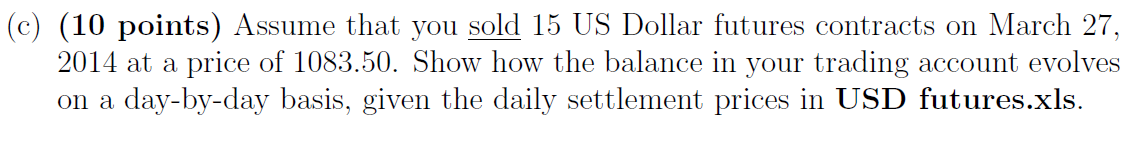

In [28]:
# Calculating Mark-to-market column for short position
usd_futures.iloc[:,1] = usd_futures[''].T.iloc[0].rolling(window=2).apply(lambda x: x[0] - x[1]) * 15 * 10000
usd_futures

Margin Account                      \
           Settlement price  Mark-to-market   Maintenance Check    
End_of_day                                                         
2014/03/27           1083.5              NaN                   0   
2014/03/28           1081.5         300000.0         6.03848e+06   
2014/03/31           1076.8         705000.0         5.33347e+06   
2014/04/01           1070.3         975000.0         4.35847e+06   
2014/04/02           1069.5         120000.0         4.23848e+06   
2014/04/03           1070.5        -150000.0         4.38848e+06   
2014/04/04           1065.9         690000.0         3.69848e+06   
2014/04/07           1067.0        -165000.0         6.40051e+06   
2014/04/08           1064.3         405000.0         5.99551e+06   
2014/04/09           1052.8        1725000.0         4.27051e+06   
2014/04/10           1051.0         270000.0         4.00051e+06   
2014/04/11           1046.3         705000.0         5.44335e+06   
2014/04/14           1050.5        -630000.0         6.07335e+06   
2014/04/15           1051.9        -210000.0         6.28335e+06   
2014/04/16           1048.3         540000.0         5.74335e+06   
2014/04/17           1049.5        -180000.0         5.92335e+06   
2014/04/18           1048.9          90000.0         5.83335e+06   
2014/04/21           1050.2        -195000.0         6.02835e+06   
2014/04/22           1048.9         195000.0         5.83335e+06   
2014/04/23           1050.5        -240000.0         6.07335e+06   
2014/04/24           1050.0          75000.0         5.99835e+06   

                                                                              
            Initial Margin   Maintenance Margin  Cash Deposit Ending Balance  
End_of_day                                                                    
2014/03/27        6338475.0            4225650.0     6338475        6338475   
2014/03/28        6326775.0            4217850.0            0    6.03848e+06  
2014/03/31        6299280.0            4199520.0            0    5.33347e+06  
2014/04/01        6261255.0            4174170.0            0    4.35847e+06  
2014/04/02        6256575.0            4171050.0            0    4.23848e+06  
2014/04/03        6262425.0            4174950.0            0    4.38848e+06  
2014/04/04        6235515.0            4157010.0  2.53704e+06    6.23552e+06  
2014/04/07        6241950.0            4161300.0            0    6.40051e+06  
2014/04/08        6226155.0            4150770.0            0    5.99551e+06  
2014/04/09        6158880.0            4105920.0            0    4.27051e+06  
2014/04/10        6148350.0            4098900.0  2.14784e+06    6.14835e+06  
2014/04/11        6120855.0            4080570.0            0    5.44335e+06  
2014/04/14        6145425.0            4096950.0            0    6.07335e+06  
2014/04/15        6153615.0            4102410.0            0    6.28335e+06  
2014/04/16        6132555.0            4088370.0            0    5.74335e+06  
2014/04/17        6139575.0            4093050.0            0    5.92335e+06  
2014/04/18        6136065.0            4090710.0            0    5.83335e+06  
2014/04/21        6143670.0            4095780.0            0    6.02835e+06  
2014/04/22        6136065.0            4090710.0            0    5.83335e+06  
2014/04/23        6145425.0            4096950.0            0    6.07335e+06  
2014/04/24        6142500.0            4095000.0            0    5.99835e+06

In [29]:
margin_call = False
for i,row in enumerate(usd_futures.iterrows()):
    if i ==0 :
        usd_futures.iloc[:,2].iloc[i] = 0
        continue
    if i == 1:
        usd_futures.iloc[:,2].iloc[i] = usd_futures.iloc[:,3].iloc[i-1] + usd_futures.iloc[:,1].iloc[i]
        usd_futures.iloc[:,5].iloc[i] = 0
        usd_futures.iloc[:,6].iloc[i] = usd_futures.iloc[:,2].iloc[i] + usd_futures.iloc[:,5].iloc[i]
        continue
    
    # 2 maintenance check
    if margin_call == True :
        usd_futures.iloc[:,2].iloc[i] = usd_futures.iloc[:,2].iloc[i-1] + usd_futures.iloc[:,1].iloc[i] + usd_futures.iloc[:,5].iloc[i-1]
    else:
        usd_futures.iloc[:,2].iloc[i] = usd_futures.iloc[:,2].iloc[i-1] + usd_futures.iloc[:,1].iloc[i]
           
    # check if margincall occur
    if usd_futures.iloc[:,2].iloc[i] < usd_futures.iloc[:,4].iloc[i] :
        margin_call = True
    else:
        margin_call = False
    
    # 5 cash deposit
    if margin_call == True:
        usd_futures.iloc[:,5].iloc[i] = usd_futures.iloc[:,3].iloc[i] - usd_futures.iloc[:,2].iloc[i]
    else:
        usd_futures.iloc[:,5].iloc[i] = 0
    # 6 ending balance
    usd_futures.iloc[:,6].iloc[i] = usd_futures.iloc[:,2].iloc[i] + usd_futures.iloc[:,5].iloc[i]
    

c:\users\wnsvy\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
usd_futures

Margin Account                      \
           Settlement price  Mark-to-market   Maintenance Check    
End_of_day                                                         
2014/03/27           1083.5              NaN                   0   
2014/03/28           1081.5         300000.0         6.63848e+06   
2014/03/31           1076.8         705000.0         7.34348e+06   
2014/04/01           1070.3         975000.0         8.31848e+06   
2014/04/02           1069.5         120000.0         8.43848e+06   
2014/04/03           1070.5        -150000.0         8.28848e+06   
2014/04/04           1065.9         690000.0         8.97847e+06   
2014/04/07           1067.0        -165000.0         8.81348e+06   
2014/04/08           1064.3         405000.0         9.21848e+06   
2014/04/09           1052.8        1725000.0         1.09435e+07   
2014/04/10           1051.0         270000.0         1.12135e+07   
2014/04/11           1046.3         705000.0         1.19185e+07   
2014/04/14           1050.5        -630000.0         1.12885e+07   
2014/04/15           1051.9        -210000.0         1.10785e+07   
2014/04/16           1048.3         540000.0         1.16185e+07   
2014/04/17           1049.5        -180000.0         1.14385e+07   
2014/04/18           1048.9          90000.0         1.15285e+07   
2014/04/21           1050.2        -195000.0         1.13335e+07   
2014/04/22           1048.9         195000.0         1.15285e+07   
2014/04/23           1050.5        -240000.0         1.12885e+07   
2014/04/24           1050.0          75000.0         1.13635e+07   

                                                                              
            Initial Margin   Maintenance Margin  Cash Deposit Ending Balance  
End_of_day                                                                    
2014/03/27        6338475.0            4225650.0     6338475        6338475   
2014/03/28        6326775.0            4217850.0            0    6.63848e+06  
2014/03/31        6299280.0            4199520.0            0    7.34348e+06  
2014/04/01        6261255.0            4174170.0            0    8.31848e+06  
2014/04/02        6256575.0            4171050.0            0    8.43848e+06  
2014/04/03        6262425.0            4174950.0            0    8.28848e+06  
2014/04/04        6235515.0            4157010.0            0    8.97847e+06  
2014/04/07        6241950.0            4161300.0            0    8.81348e+06  
2014/04/08        6226155.0            4150770.0            0    9.21848e+06  
2014/04/09        6158880.0            4105920.0            0    1.09435e+07  
2014/04/10        6148350.0            4098900.0            0    1.12135e+07  
2014/04/11        6120855.0            4080570.0            0    1.19185e+07  
2014/04/14        6145425.0            4096950.0            0    1.12885e+07  
2014/04/15        6153615.0            4102410.0            0    1.10785e+07  
2014/04/16        6132555.0            4088370.0            0    1.16185e+07  
2014/04/17        6139575.0            4093050.0            0    1.14385e+07  
2014/04/18        6136065.0            4090710.0            0    1.15285e+07  
2014/04/21        6143670.0            4095780.0            0    1.13335e+07  
2014/04/22        6136065.0            4090710.0            0    1.15285e+07  
2014/04/23        6145425.0            4096950.0            0    1.12885e+07  
2014/04/24        6142500.0            4095000.0            0    1.13635e+07

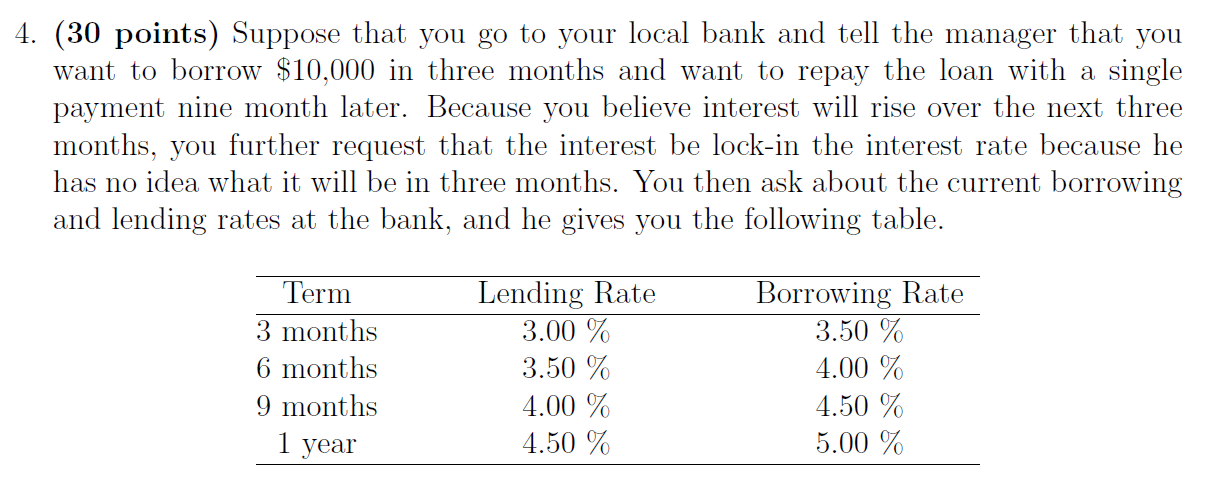

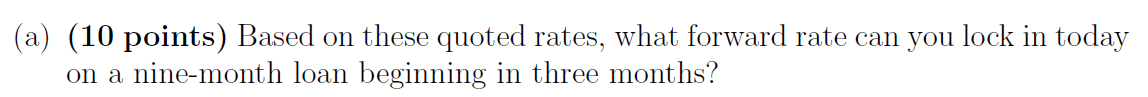

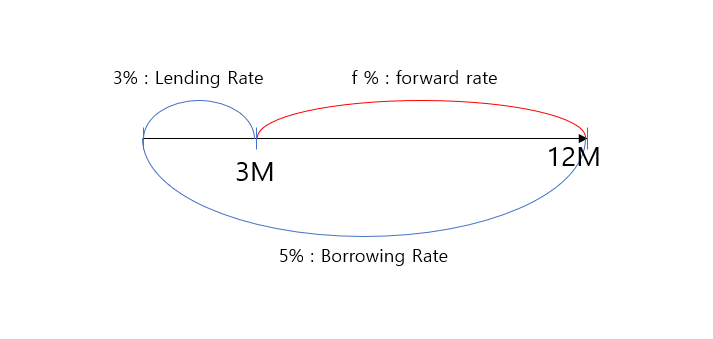

### - Since we know the two spot rates of 3 months and 12 months, we can calculate forward rate by solving the following equation.

## $$e^{0.05 \times \frac{12}{12}} = e^{f \times \frac{9}{12}}e^{0.03 \times \frac{3}{12}}$$

### $$0.05  = f \times \frac{3}{4} + 0.03 \times \frac{1}{4}$$

### Then f is given by, 

In [31]:
(0.05-0.03/4) * (4/3)

0.05666666666666667

### $$ f_{0.25,\,1}=0.05667 = 5.667\% $$

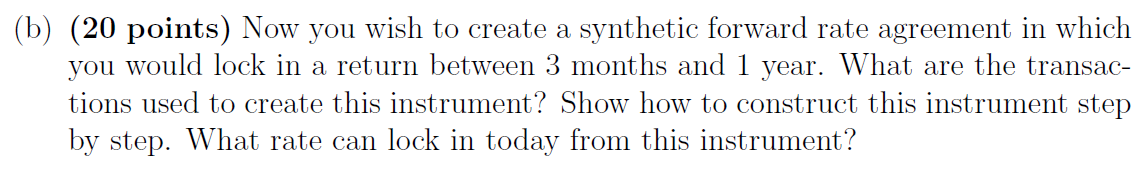

### - To make the forward cashflow, first discount the 10,000 over the 3 Months with lending rate.

In [32]:
10000 * np.exp(-0.03 * (3/12))

9925.280548191384

### - Next Borrow that money today with one year borrowing rate, then repay amount shoud be

In [33]:
9925.28 * np.exp(0.05*(12/12))

10434.159987439025

### - Sum this two, composed forward should be like following figure

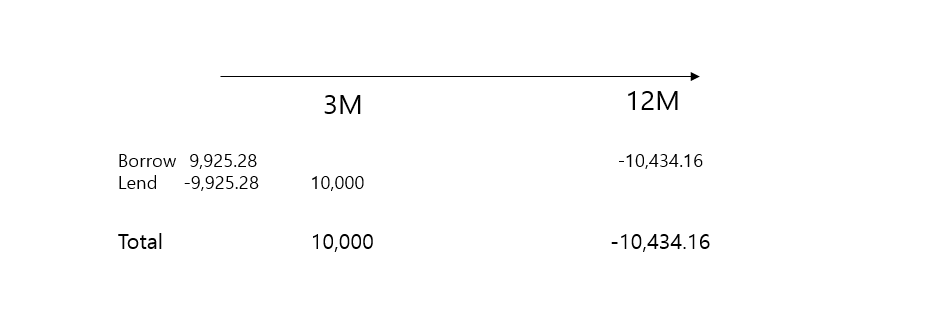

### - To calculate the rate, solve the equation $ e^{r \times (9/12)} = \frac{10434.16}{10000}$

In [34]:
(12/9) * np.log(10434.16/10000)

0.05666659462933707

### Thus r = 5.667 %  Note that this value is same as (a)

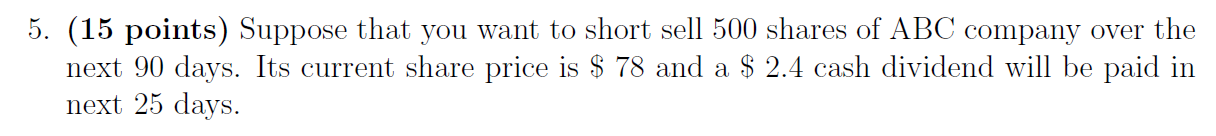

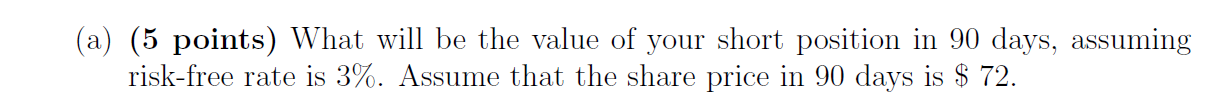

### To calculate the value of short position, we'll make a riskless portfolio 

#### At T = 0, Sell stock & Invest with $R_f$

> Sell Stock : $ 78 \times 500$ <br>
> Invest with $R_f$ : $-78 \times 500$ <br>
> Total Value = 0

#### At T = 90, portfolio value will be

> Stock : $ -72 \times 500 - 2.4 \times 500 \times e^{(0.03)\times \frac{90-25}{365}}$ <br>
> With $R_f$ : $ 78 \times 500 \times e^{(0.03)\times \frac{90}{365}}$ <br>
> Total Value = ???

In [35]:
stock_value = -72 * 500 - 2.4 * 500 * np.exp(0.03 * (65/365))
stock_value

-37206.42811460595

In [36]:
invest_value = 78 * 500 * np.exp(0.03 * 90/365)
invest_value

39289.56281605073

In [37]:
invest_value + stock_value

2083.134701444782

### Thus Value is 2083.135

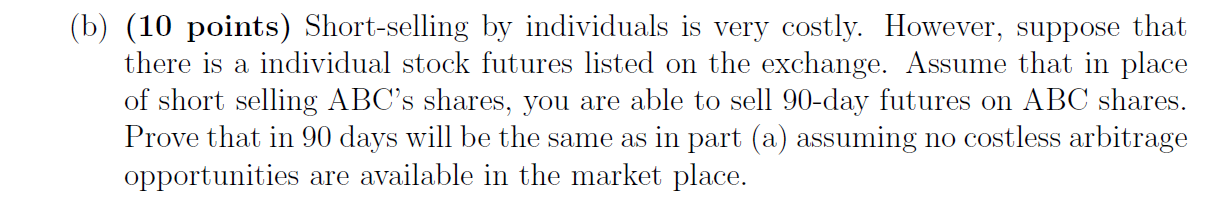

### If no arbitrage assumption holds, then $f$ is given by,

In [38]:
f = 78 * np.exp(0.03*(90/365)) - 2.4 * np.exp(0.03*(90-25)/365)
f

76.16626940288957

### Then sell forward profit should be

In [39]:
-(72-f) * 500

2083.1347014447842

### Thus, profit is same in part (a)